In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools

%matplotlib inline

In [2]:
folder = r'C:\Magisterka\Predicting-the-results-of-Premier-League-matches\dataset_2\\'

# Wczytywanie danych z pełnymi ścieżkami do plików
raw_data_10 = pd.read_csv(folder + '2010-11.csv')
raw_data_11 = pd.read_csv(folder + '2011-12.csv')
raw_data_12 = pd.read_csv(folder + '2012-13.csv')
raw_data_13 = pd.read_csv(folder + '2013-14.csv')
raw_data_14 = pd.read_csv(folder + '2014-15.csv')
raw_data_15 = pd.read_csv(folder + '2015-16.csv')
raw_data_16 = pd.read_csv(folder + '2016-17.csv')
raw_data_17 = pd.read_csv(folder + '2017-18.csv')
raw_data_18 = pd.read_csv(folder + '2018-19.csv')
raw_data_19 = pd.read_csv(folder + '2019-20.csv')
raw_data_20 = pd.read_csv(folder + '2020-21.csv')
raw_data_21 = pd.read_csv(folder + '2021-22.csv')


In [3]:
#Gets all the statistics related to gameplay

columns_req = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR'] #FTHG = Full Time Home Team Goals, FTAG = Full Time Away Team Goals, FTR = Full Time Result

playing_statistics_10 = raw_data_10[columns_req]
playing_statistics_11 = raw_data_11[columns_req]   
playing_statistics_12 = raw_data_12[columns_req]
playing_statistics_13 = raw_data_13[columns_req]
playing_statistics_14 = raw_data_14[columns_req]
playing_statistics_15 = raw_data_15[columns_req]
playing_statistics_16 = raw_data_16[columns_req]
playing_statistics_17 = raw_data_17[columns_req]
playing_statistics_18 = raw_data_18[columns_req]
playing_statistics_19 = raw_data_19[columns_req]
playing_statistics_20 = raw_data_20[columns_req]
playing_statistics_21 = raw_data_21[columns_req]


In [4]:
import pandas as pd

# Funkcja obliczająca gole zdobyte przez drużyny
def get_goals_scored(playing_stat):
    # Słownik z nazwami drużyn jako kluczami
    teams = {team: [] for team in playing_stat['HomeTeam'].unique()}
    
    # Gromadzenie goli zdobytych
    for i in range(len(playing_stat)):
        HTGS = playing_stat.iloc[i]['FTHG']  # Gole gospodarzy
        ATGS = playing_stat.iloc[i]['FTAG']  # Gole gości
        teams[playing_stat.iloc[i].HomeTeam].append(HTGS)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGS)
    
    # Maksymalna liczba kolejek na podstawie danych
    max_rounds = max(len(games) for games in teams.values())
    
    # DataFrame dla goli zdobytych
    GoalsScored = pd.DataFrame(teams, index=[i for i in range(1, max_rounds + 1)]).T.fillna(0)
    GoalsScored[0] = 0  # Dodanie kolumny zerowych goli na start
    for i in range(2, max_rounds + 1):
        GoalsScored[i] += GoalsScored[i - 1]  # Sumowanie kumulacyjne
    
    return GoalsScored

# Funkcja obliczająca gole stracone przez drużyny
def get_goals_conceded(playing_stat):
    # Słownik z nazwami drużyn jako kluczami
    teams = {team: [] for team in playing_stat['HomeTeam'].unique()}
    
    # Gromadzenie goli straconych
    for i in range(len(playing_stat)):
        ATGC = playing_stat.iloc[i]['FTHG']  # Gole zdobyte przez gości
        HTGC = playing_stat.iloc[i]['FTAG']  # Gole zdobyte przez gospodarzy
        teams[playing_stat.iloc[i].HomeTeam].append(HTGC)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGC)
    
    # Maksymalna liczba kolejek na podstawie danych
    max_rounds = max(len(games) for games in teams.values())
    
    # DataFrame dla goli straconych
    GoalsConceded = pd.DataFrame(teams, index=[i for i in range(1, max_rounds + 1)]).T.fillna(0)
    GoalsConceded[0] = 0  # Dodanie kolumny zerowych goli na start
    for i in range(2, max_rounds + 1):
        GoalsConceded[i] += GoalsConceded[i - 1]  # Sumowanie kumulacyjne
    
    return GoalsConceded

# Funkcja łącząca gole zdobyte i stracone w statystykach
def get_gss(playing_stat):
    GC = get_goals_conceded(playing_stat)
    GS = get_goals_scored(playing_stat)
   
    j = 0
    HTGS = []  # Gole zdobyte przez gospodarzy
    ATGS = []  # Gole zdobyte przez gości
    HTGC = []  # Gole stracone przez gospodarzy
    ATGC = []  # Gole stracone przez gości

    for i in range(len(playing_stat)):
        ht = playing_stat.iloc[i].HomeTeam  # Drużyna gospodarzy
        at = playing_stat.iloc[i].AwayTeam  # Drużyna gości
        HTGS.append(GS.loc[ht][j])
        ATGS.append(GS.loc[at][j])
        HTGC.append(GC.loc[ht][j])
        ATGC.append(GC.loc[at][j])
        
        if ((i + 1) % 10) == 0:  # Po każdych 10 meczach przejście do następnej kolejki
            j += 1
        
    # Dodanie kolumn do oryginalnych statystyk
    playing_stat['HTGS'] = HTGS
    playing_stat['ATGS'] = ATGS
    playing_stat['HTGC'] = HTGC
    playing_stat['ATGC'] = ATGC
    
    return playing_stat

# Przykład użycia funkcji na danych
# Zakładając, że dane są wczytane w `playing_statistics_X`
playing_statistics_10 = get_gss(playing_statistics_10)
playing_statistics_11 = get_gss(playing_statistics_11)
playing_statistics_12 = get_gss(playing_statistics_12)
playing_statistics_13 = get_gss(playing_statistics_13)
playing_statistics_14 = get_gss(playing_statistics_14)
playing_statistics_15 = get_gss(playing_statistics_15)
playing_statistics_16 = get_gss(playing_statistics_16)
playing_statistics_17 = get_gss(playing_statistics_17)
playing_statistics_18 = get_gss(playing_statistics_18)
playing_statistics_19 = get_gss(playing_statistics_19)
playing_statistics_20 = get_gss(playing_statistics_20)
playing_statistics_21 = get_gss(playing_statistics_21)


C:\Users\dawid\AppData\Local\Temp\ipykernel_47408\675924912.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTGS'] = HTGS
C:\Users\dawid\AppData\Local\Temp\ipykernel_47408\675924912.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATGS'] = ATGS
C:\Users\dawid\AppData\Local\Temp\ipykernel_47408\675924912.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [5]:
print(playing_statistics_10.columns)
print(playing_statistics_10.head())


Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS',
       'HTGC', 'ATGC'],
      dtype='object')
       Date     HomeTeam    AwayTeam  FTHG  FTAG FTR  HTGS  ATGS  HTGC  ATGC
0  14/08/10  Aston Villa    West Ham     3     0   H     0     0     0     0
1  14/08/10    Blackburn     Everton     1     0   H     0     0     0     0
2  14/08/10       Bolton      Fulham     0     0   D     0     0     0     0
3  14/08/10      Chelsea   West Brom     6     0   H     0     0     0     0
4  14/08/10   Sunderland  Birmingham     2     2   D     0     0     0     0


In [6]:
def get_points(result):
    if result == 'W':
        return 3
    elif result == 'D':
        return 1
    else:
        return 0
    

def get_cuml_points(matchres):
    matchres_points = matchres.applymap(get_points)
    max_rounds = matchres_points.shape[1]  # Liczba kolejek w danych

    for i in range(2, max_rounds + 1):  # Iterujemy po dostępnych kolejkach
        matchres_points[i] = matchres_points[i] + matchres_points[i - 1]
    
    # Dodanie początkowej kolumny zerowych punktów
    matchres_points.insert(0, 0, 0)
    return matchres_points


def get_matchres(playing_stat):
    # Tworzenie słownika z drużynami jako kluczami
    teams = {team: [] for team in playing_stat['HomeTeam'].unique()}

    # Iteracja po wierszach danych i przypisywanie wyników W, D, L
    for i in range(len(playing_stat)):
        if playing_stat.iloc[i]['FTR'] == 'H':  # Wygrana gospodarzy
            teams[playing_stat.iloc[i]['HomeTeam']].append('W')
            teams[playing_stat.iloc[i]['AwayTeam']].append('L')
        elif playing_stat.iloc[i]['FTR'] == 'A':  # Wygrana gości
            teams[playing_stat.iloc[i]['AwayTeam']].append('W')
            teams[playing_stat.iloc[i]['HomeTeam']].append('L')
        else:  # Remis
            teams[playing_stat.iloc[i]['HomeTeam']].append('D')
            teams[playing_stat.iloc[i]['AwayTeam']].append('D')

    # Tworzenie DataFrame z wynikami meczów
    max_rounds = max(len(results) for results in teams.values())  # Liczba kolejek
    return pd.DataFrame(data=teams, index=[i for i in range(1, max_rounds + 1)]).T.fillna('D')

def get_agg_points(playing_stat):
    matchres = get_matchres(playing_stat)
    cum_pts = get_cuml_points(matchres)
    HTP = []
    ATP = []
    j = 0
    for i in range(len(playing_stat)):  # Użycie rzeczywistej liczby wierszy
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTP.append(cum_pts.loc[ht][j])
        ATP.append(cum_pts.loc[at][j])

        if ((i + 1) % 10) == 0:
            j = j + 1
         
    playing_stat['HTP'] = HTP
    playing_stat['ATP'] = ATP
    return playing_stat

    
# Apply to each dataset
playing_statistics_10 = get_agg_points(playing_statistics_10)
playing_statistics_11 = get_agg_points(playing_statistics_11)
playing_statistics_12 = get_agg_points(playing_statistics_12)
playing_statistics_13 = get_agg_points(playing_statistics_13)
playing_statistics_14 = get_agg_points(playing_statistics_14)
playing_statistics_15 = get_agg_points(playing_statistics_15)
playing_statistics_16 = get_agg_points(playing_statistics_16)
playing_statistics_17 = get_agg_points(playing_statistics_17)
playing_statistics_18 = get_agg_points(playing_statistics_18)
playing_statistics_19 = get_agg_points(playing_statistics_19)
playing_statistics_20 = get_agg_points(playing_statistics_20)
playing_statistics_21 = get_agg_points(playing_statistics_21)


C:\Users\dawid\AppData\Local\Temp\ipykernel_47408\579836504.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  matchres_points = matchres.applymap(get_points)
C:\Users\dawid\AppData\Local\Temp\ipykernel_47408\579836504.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTP'] = HTP
C:\Users\dawid\AppData\Local\Temp\ipykernel_47408\579836504.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATP'] = ATP
C:\Users\dawid\AppData\Local\Temp\i

In [7]:
def get_form(playing_stat, num):
    form = get_matchres(playing_stat)
    form_final = form.copy()
    max_rounds = form.shape[1]  # Liczba kolejek w danych

    for i in range(num, max_rounds + 1):  # Używamy rzeczywistej liczby kolejek
        form_final[i] = ''
        j = 0
        while j < num:
            form_final[i] += form[i - j]
            j += 1           
    return form_final


def add_form(playing_stat, num):
    form = get_form(playing_stat, num)
    max_rounds = form.shape[1]  # Liczba kolejek w danych
    h = ['M' for i in range(num * 10)]  # Wyniki dla pierwszych num * 10 meczów
    a = ['M' for i in range(num * 10)]

    j = num
    for i in range((num * 10), len(playing_stat)):  # Używamy rzeczywistej liczby wierszy
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        
        past = form.loc[ht][j]  # Wyniki przeszłych meczów gospodarzy
        h.append(past[num - 1])  # Najnowszy wynik
        
        past = form.loc[at][j]  # Wyniki przeszłych meczów gości
        a.append(past[num - 1])  # Najnowszy wynik
        
        if ((i + 1) % 10) == 0 and j < max_rounds:
            j = j + 1

    playing_stat['HM' + str(num)] = h                 
    playing_stat['AM' + str(num)] = a
    return playing_stat



def add_form_df(playing_statistics):
    playing_statistics = add_form(playing_statistics, 1)
    playing_statistics = add_form(playing_statistics, 2)
    playing_statistics = add_form(playing_statistics, 3)
    playing_statistics = add_form(playing_statistics, 4)
    playing_statistics = add_form(playing_statistics, 5)
    return playing_statistics
   
    
# Make changes to df
playing_statistics_10 = add_form_df(playing_statistics_10)
playing_statistics_11 = add_form_df(playing_statistics_11)
playing_statistics_12 = add_form_df(playing_statistics_12)
playing_statistics_13 = add_form_df(playing_statistics_13)
playing_statistics_14 = add_form_df(playing_statistics_14)
playing_statistics_15 = add_form_df(playing_statistics_15)
playing_statistics_16 = add_form_df(playing_statistics_16)
playing_statistics_17 = add_form_df(playing_statistics_17)
playing_statistics_18 = add_form_df(playing_statistics_18)
playing_statistics_19 = add_form_df(playing_statistics_19)
playing_statistics_20 = add_form_df(playing_statistics_20)
playing_statistics_21 = add_form_df(playing_statistics_21)

C:\Users\dawid\AppData\Local\Temp\ipykernel_47408\2693835205.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HM' + str(num)] = h
C:\Users\dawid\AppData\Local\Temp\ipykernel_47408\2693835205.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['AM' + str(num)] = a
C:\Users\dawid\AppData\Local\Temp\ipykernel_47408\2693835205.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [8]:
# Rearranging columns
cols = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
        'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5' ]


playing_statistics_10 = playing_statistics_10[cols]
playing_statistics_11 = playing_statistics_11[cols]
playing_statistics_12 = playing_statistics_12[cols]
playing_statistics_13 = playing_statistics_13[cols]
playing_statistics_14 = playing_statistics_14[cols]
playing_statistics_15 = playing_statistics_15[cols]
playing_statistics_16 = playing_statistics_16[cols]
playing_statistics_17 = playing_statistics_17[cols]
playing_statistics_18 = playing_statistics_18[cols]
playing_statistics_19 = playing_statistics_19[cols]
playing_statistics_20 = playing_statistics_20[cols]
playing_statistics_21 = playing_statistics_21[cols]

In [9]:
def get_mw(playing_stat):
    j = 1
    MatchWeek = []
    for i in range(len(playing_stat)):  # Dynamiczna liczba wierszy
        MatchWeek.append(j)
        if ((i + 1) % 10) == 0:
            j = j + 1
    playing_stat['MW'] = MatchWeek
    return playing_stat

playing_statistics_10 = get_mw(playing_statistics_10)
playing_statistics_11 = get_mw(playing_statistics_11)
playing_statistics_12 = get_mw(playing_statistics_12)
playing_statistics_13 = get_mw(playing_statistics_13)
playing_statistics_14 = get_mw(playing_statistics_14)
playing_statistics_15 = get_mw(playing_statistics_15)
playing_statistics_16 = get_mw(playing_statistics_16)
playing_statistics_17 = get_mw(playing_statistics_17)
playing_statistics_18 = get_mw(playing_statistics_18)
playing_statistics_19 = get_mw(playing_statistics_19)
playing_statistics_20 = get_mw(playing_statistics_20)
playing_statistics_21 = get_mw(playing_statistics_21)

In [10]:
playing_stat = pd.concat([
                        playing_statistics_10,
                        playing_statistics_11,
                        playing_statistics_12,
                        playing_statistics_13,
                        playing_statistics_14,
                        playing_statistics_15,
                        playing_statistics_16,
                        playing_statistics_17,
                        playing_statistics_18,
                        playing_statistics_19,
                        playing_statistics_20,
                        playing_statistics_21
                          ], ignore_index=True)


# Gets the form points.
def get_form_points(string):
    sum = 0
    for letter in string:
        sum += get_points(letter)
    return sum

playing_stat['HTFormPtsStr'] = playing_stat['HM1'] + playing_stat['HM2'] + playing_stat['HM3'] + playing_stat['HM4'] + playing_stat['HM5']
playing_stat['ATFormPtsStr'] = playing_stat['AM1'] + playing_stat['AM2'] + playing_stat['AM3'] + playing_stat['AM4'] + playing_stat['AM5']

playing_stat['HTFormPts'] = playing_stat['HTFormPtsStr'].apply(get_form_points)
playing_stat['ATFormPts'] = playing_stat['ATFormPtsStr'].apply(get_form_points)

# Identify Win/Loss Streaks if any.
def get_3game_ws(string):
    if string[-3:] == 'WWW':
        return 1
    else:
        return 0
    
def get_5game_ws(string):
    if string == 'WWWWW':
        return 1
    else:
        return 0
    
def get_3game_ls(string):
    if string[-3:] == 'LLL':
        return 1
    else:
        return 0
    
def get_5game_ls(string):
    if string == 'LLLLL':
        return 1
    else:
        return 0
    
playing_stat['HTWinStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ws)
playing_stat['HTWinStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ws)
playing_stat['HTLossStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ls)
playing_stat['HTLossStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ls)

playing_stat['ATWinStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ws)
playing_stat['ATWinStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ws)
playing_stat['ATLossStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ls)
playing_stat['ATLossStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ls)

playing_stat.keys()

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS',
       'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1',
       'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr', 'ATFormPtsStr',
       'HTFormPts', 'ATFormPts', 'HTWinStreak3', 'HTWinStreak5',
       'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5',
       'ATLossStreak3', 'ATLossStreak5'],
      dtype='object')

In [11]:
# Get Goal Difference
playing_stat['HTGD'] = playing_stat['HTGS'] - playing_stat['HTGC']
playing_stat['ATGD'] = playing_stat['ATGS'] - playing_stat['ATGC']

# Diff in points
playing_stat['DiffPts'] = playing_stat['HTP'] - playing_stat['ATP']
playing_stat['DiffFormPts'] = playing_stat['HTFormPts'] - playing_stat['ATFormPts']

In [12]:
# Scale DiffPts , DiffFormPts, HTGD, ATGD by Matchweek.
cols = ['HTGD','ATGD','DiffPts','DiffFormPts','HTP','ATP']
playing_stat.MW = playing_stat.MW.astype(float)

for col in cols:
    playing_stat[col] = playing_stat[col] / playing_stat.MW

In [13]:
def only_hw(string):
    if string == 'H':
        return 'H'
    else:
        return 'NH'
    
playing_stat['FTR'] = playing_stat.FTR.apply(only_hw)

# Testing set (2015-16 season)
playing_stat_test = playing_stat[5700:]

In [14]:
#saving the final dataset
playing_stat.to_csv('final_dataset_2.csv')

In [15]:
#saving the test set
playing_stat_test.to_csv("test_set_2.csv")

In [16]:
#loading the final dataset
dataset = pd.read_csv('final_dataset_2.csv')

In [17]:
dataset.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,0,14/08/10,Aston Villa,West Ham,3,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,1,14/08/10,Blackburn,Everton,1,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,2,14/08/10,Bolton,Fulham,0,0,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,3,14/08/10,Chelsea,West Brom,6,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,4,14/08/10,Sunderland,Birmingham,2,2,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [18]:
dataset.keys()

Index(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
       'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5', 'HTGD', 'ATGD',
       'DiffPts', 'DiffFormPts'],
      dtype='object')

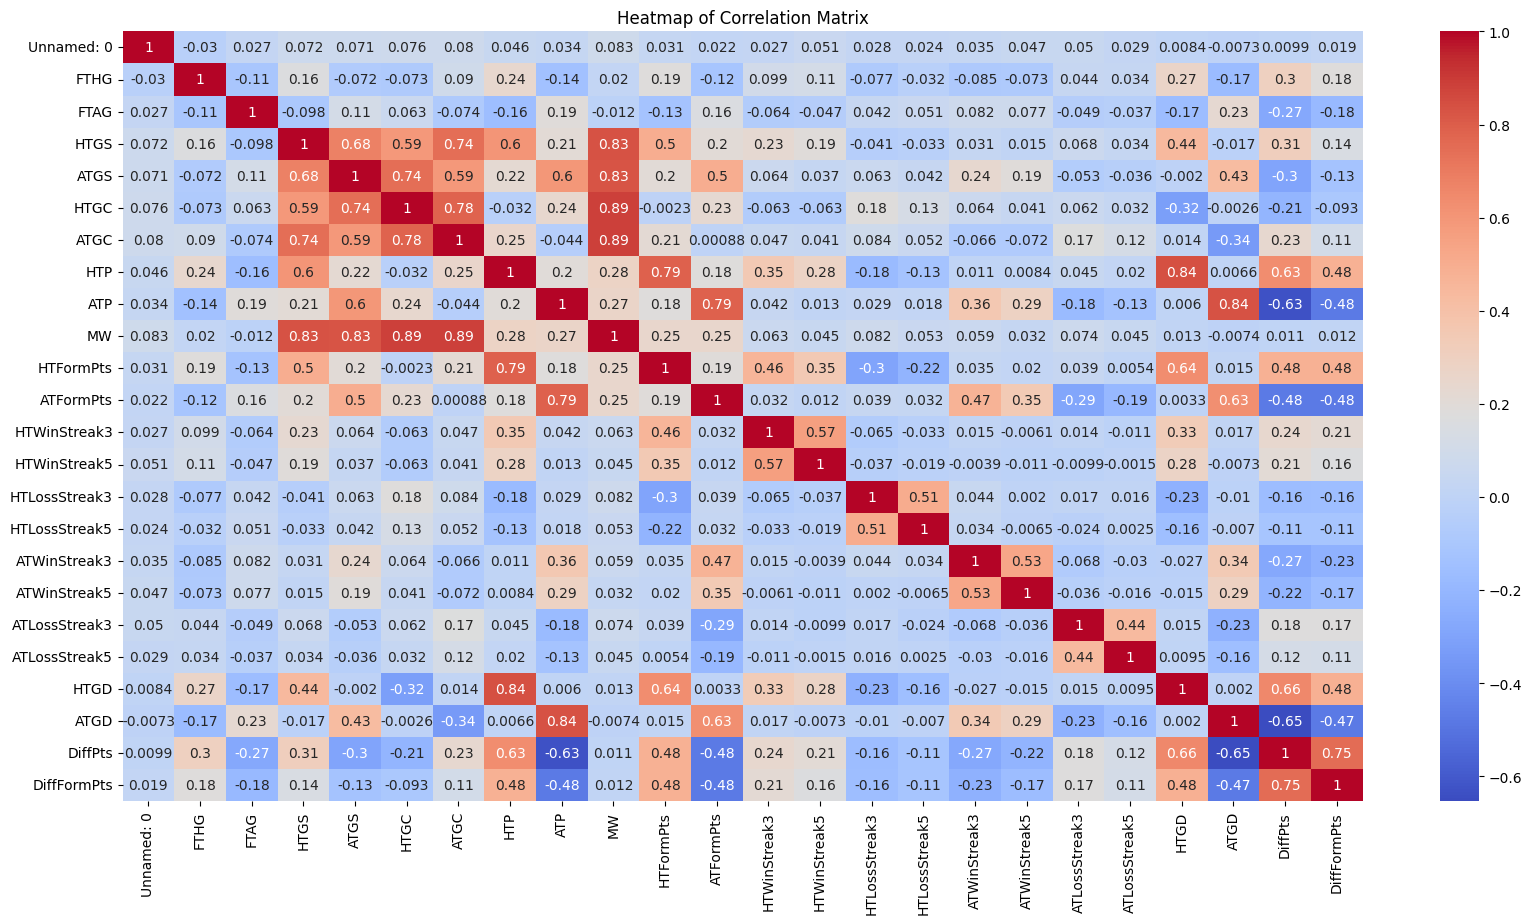

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Wybranie tylko kolumn numerycznych
numeric_dataset = dataset.select_dtypes(include=['number'])

# Tworzenie heatmapy
plt.figure(figsize=(20, 10))
sns.heatmap(numeric_dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap of Correlation Matrix")
plt.show()


In [20]:
# Remove few column
dataset2 = dataset.copy().drop(columns =['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'HTGS', 'ATGS', 'HTGC', 'ATGC',
       'HM4', 'HM5','AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'DiffPts'] )

In [21]:
dataset2.keys()

Index(['Unnamed: 0', 'FTR', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'AM1', 'AM2',
       'AM3', 'HTGD', 'ATGD', 'DiffFormPts'],
      dtype='object')

In [22]:
dataset2.head(10)

,Unnamed: 0,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts
0,0,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
1,1,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
2,2,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
3,3,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
4,4,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
5,5,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
6,6,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
7,7,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
8,8,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
9,9,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0


In [23]:
#what is the win rate for the home team?

# Total number of matches.
n_matches = dataset2.shape[0]

# Calculate number of features. -1 because we are saving one as the target variable (win/lose/draw)
n_features = dataset2.shape[1] - 1

# Calculate matches won by home team.
n_homewins = len(dataset2[dataset2.FTR == 'H'])

# Calculate win rate for home team.
win_rate = (float(n_homewins) / (n_matches)) * 100

# Print the results
print("Total number of matches: {}".format(n_matches))
print ("Number of features: {}".format(n_features))
print( "Number of matches won by home team: {}".format(n_homewins))
print ("Win rate of home team: {:.2f}%".format(win_rate))

Total number of matches: 4560
Number of features: 12
Number of matches won by home team: 2044
Win rate of home team: 44.82%
